In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
%matplotlib inline

In [98]:
# load train data
def load_train():
    train = np.loadtxt("./data/pendigits-train.csv",delimiter=',')
    train.shape
    train_data = train[:, :16]
    train_lable = train[:, 16:17]
    train_lable = train_lable.reshape(len(train_lable))
    return train_data, train_lable


In [56]:
def load_test():
    test = np.loadtxt("./data/pendigits-test-nolabels.csv", delimiter=',')
    test = test.reshape(len(test), -1)
    print test.shape
    return test

In [35]:
# visualize data
# e.g. visualize(train_data[1266, :], train_lable[1266])
def visualize(data, lable = None):
    data_x = data[::2]
    data_y = data[1::2]
    plt.plot(data_x, data_y)
    if lable != None:
        print "Number is : ", lable

In [109]:
def shuffleData(data, lable):
    data_index = np.arange(len(data))
    np.random.shuffle(data_index)
    train_index = data_index[:3000]
    validation_index = data_index[3000:]
    train_data = data[train_index]
    train_lable = lable[train_index]
    validation_data = data[validation_index]
    validation_lable = lable[validation_index]
    return train_data, train_lable, validation_data, validation_lable


In [110]:
data, lable  = load_train()
train_data, train_lable, validation_data, validation_lable = shuffleData(data, lable)

In [112]:
# svm main
clf = svm.SVC()
clf.fit(train_data, train_lable)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [120]:
# validation
correct = 0
for i in range(len(validation_lable)):
    sample = validation_data[i, :].reshape(1, -1)    
    number = int(clf.predict(sample))
    #print "number: ", number
    #print "lable: ", int(validation_lable[i])
    if number == validation_lable[i]:
        correct += 1
print "Correct rate: ", correct / float(len(validation_lable))
    

Correct rate:  0.105898123324


(1L, 16L)
[ 3.]


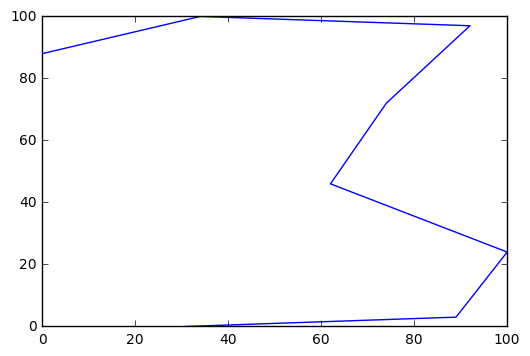

In [91]:
sample = train_data[1200,:]
visualize(sample)
sample= sample.reshape(1, -1)
print sample.shape
print clf.predict(sample)

(1L, 16L)
[ 0.]


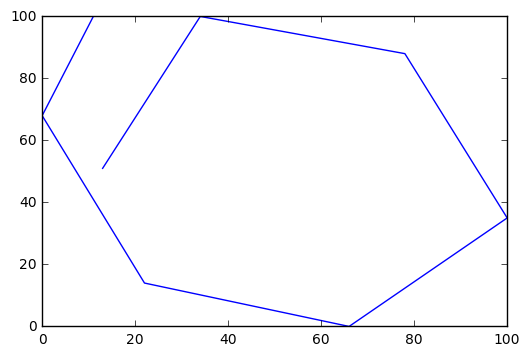

In [94]:
sample = validation_data[60,:]
visualize(sample)
sample= sample.reshape(1, -1)
print sample.shape
print clf.predict(sample)

In [62]:
sample.reshape(1, 16)

array([[ 100.,   83.,   29.,  100.,   27.,   65.,   86.,   32.,   59.,
           0.,    0.,   21.,   45.,   58.,   99.,   89.]])

In [59]:
sample = test[85,:]
